In [3]:
# importing packages and nltk data libraries
import string
import json
import codecs
import re

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from colorama import Fore, Back, Style
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rayhi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
# load the twitter processing python class for use
# for those code that we repeatingly use but doesn't change much, or only change due to input, it is good to write them as
# functions and call later, which we are doing here.
# As the weeks goes by, we will increasingly do and make use of the benefits of scripts but also the interactivity of
# interactive Jupyter notebooks
%load_ext autoreload
%autoreload 1

# we are importing RedditProcessing.py and its contents
%aimport RedditProcessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
# vader sentiment analysis
def vaderPrintTokens(lTokens, dSentimentScores):
    """
    Print out the tokens and sentiment score.
    
    @param lTokens: List of tokens to print and colour.
    @dSentimentScores: Dictionary of sentiment from Vader.

    """
    print(*lTokens, sep=', ')
    for cat,score in dSentimentScores.items():
        print('{0}: {1}, '.format(cat, score), end='')
    print()

def vaderSentimentAnalysis(sTweetsFilename, bPrint, tweetProcessor=None):
    """
    Use Vader lexicons instead of a raw positive and negative word count.

    @param sTweetsFilename: name of input file containing a json formated tweet dump
    @param bPrint: whether to print the stream of tokens and sentiment.  Uses colorama to highlight sentiment words.
    @param tweetProcessor: TweetProcessing object, used to pre-process each tweet.

    @returns: list of tweets, in the format of [date, sentiment]
    """

    # this is the vader sentiment analyser, part of nltk
    sentAnalyser = SentimentIntensityAnalyzer()


    lSentiment = []
    # open file and process tweets, one by one
    csvPD=pd.read_csv(sTweetsFilename)
    titleData = csvPD['Title']

    # pre-process the post text
    for i,postText in titleData.items():
        lTokens = redditProcessor.process(postText)

        # this computes the sentiment scores (called polarity score in nltk, but mean same thing essentially)
        # see workshop sheet for what dSentimentScores holds
        dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))

        # save the date and sentiment of each post (used for time series)
        lSentiment.append([pd.to_datetime(csvPD['Time'][i]), dSentimentScores['compound']])

        # if we are printing, we print the tokens then the sentiment scores.  Because we don't have the list
        # of positive and negative words, we cannot use colorama to label each token
        if bPrint:
            vaderPrintTokens(lTokens, dSentimentScores)


    # process the comments
    commentData = csvPD['TopComment']
        
    for i,postText in commentData.items():
        lTokens = redditProcessor.process(postText)
        # pre-process the post text
        lTokens = redditProcessor.process(postText)

        # this computes the sentiment scores (called polarity score in nltk, but mean same thing essentially)
        # see workshop sheet for what dSentimentScores holds
        dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))

        # save the date and sentiment of each post (used for time series)
        lSentiment.append([pd.to_datetime(csvPD['Time'][i]), dSentimentScores['compound']])

        # if we are printing, we print the tokens then the sentiment scores.  Because we don't have the list
        # of positive and negative words, we cannot use colorama to label each token
        if bPrint:
            # print(postText)
            vaderPrintTokens(lTokens, dSentimentScores)


    return lSentiment

In [68]:
# input file of set of postive words
posWordFile = 'positive-words.txt'
# input file of set of negative words
negWordFile = 'negative-words.txt'
# input file of set of reddit posts (json format)
redditFile = 'dataFromReddit_programming.csv'
# flag to determine whether to print out tweets and their sentiment
flagPrint = True

In [24]:
# construct the reddit pro-processing object
# use tweet tokenizer
tweetTokenizer = TweetTokenizer()
lPunct = list(string.punctuation)
# standard 'English' stopwords plus we want to remove things like 'rt' (retweet) etc
lStopwords = stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '`']

# call the RedditProcessing python script
redditProcessor = RedditProcessing.RedditProcessing(tweetTokenizer, lStopwords)


# load set of positive words
lPosWords = []
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    for sLine in fPos:
        lPosWords.append(sLine.strip())

setPosWords = set(lPosWords)


# load set of negative words
lNegWords = []
with codecs.open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    for sLine in fNeg:
        lNegWords.append(sLine.strip())

setNegWords = set(lNegWords)

In [75]:
lSentiment1 = vaderSentimentAnalysis(redditFile, flagPrint, redditProcessor)

’, reason, programmers, always, want, throw, away, old, code, start, think, old, code, mess, probably, wrong, reason, think, old, code, mess, cardinal, fundamental, law, programming, ’, harder, read, code, write
neg: 0.243, neu: 0.719, pos: 0.039, compound: -0.7783, 
youtube, page, load, 5x, slower, firefox, edge, chrome, youtube's, polymer, redesign, relies, deprecated, shadow, dom, v0, api, implemented, chrome
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
google, wins, trial, oracle, jury, finds, android, “, fair, use, ”
neg: 0.0, neu: 0.538, pos: 0.462, compound: 0.7184, 
til, there's, community, called, dwitter, people, compose, 140, character, javascript, programs, produce, interesting, visuals
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.4019, 
cool, website, explains, algorithms, ikea, instruction, manuals
neg: 0.0, neu: 0.723, pos: 0.277, compound: 0.3182, 
cut, gta, online, loading, times, 70
neg: 0.296, neu: 0.704, pos: 0.0, compound: -0.2732, 
linus, torvalds, think, somebo

deepmind, go, ai, defeats, european, champion, neural, networks, monte-carlo, tree, search, reinforcement, learning
neg: 0.134, neu: 0.64, pos: 0.227, compound: 0.3818, 
privacy, analysis, tiktok, ’, app, website
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
nothing's, damaging, programming, right, shipping, costs, mantra, create, burnout, factories, loads, teams, tech, debt, people, leave, burnout, tackle, saw, devs, posting, favorite, lessons, 2022, mine, unfortunately
neg: 0.272, neu: 0.58, pos: 0.148, compound: -0.5106, 
kernighan's, law, debugging, twice, hard, writing, code, first, place, therefore, write, code, cleverly, possible, definition, smart, enough, debug
neg: 0.062, neu: 0.67, pos: 0.268, compound: 0.6808, 
researcher, hacks, 35, tech, firms, creating, public, npm, packages
neg: 0.0, neu: 0.784, pos: 0.216, compound: 0.296, 
friend, made, visual, studio, plugin, lets, see, files, teammates, working, real, time, help, prevent, merge, conflicts, also, get, diff, version, 

really, useful, information, startups, trouble, making, profit, switch, code, base, spaces, tabs, save, 25, employee's, wages, ceo, exclusively, use, spaces, sweet, 34, increase, salary
neg: 0.077, neu: 0.51, pos: 0.413, compound: 0.8977, 
where's, link
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
infuriating, thing, password, policies, frequently, revealed, piecemeal, attempts, passwords, violate, rules, rather, disclosed, full, front, make, damn, password, compliant, shit, rules
neg: 0.431, neu: 0.569, pos: 0.0, compound: -0.9169, 
surprise, nice, someone, something, empirical, establish, paul, graham's, article, captures, something, us, know, probably, consider, often, developers, try, hard, things, interruption, impending, even, find, hard, get, started, something, hard, merely, likely, i'll, interrupted, demoralizing, exhausting, lose, much, work, relatedly, often, wonder, structure, developer, interaction, order, minimize, cost, interruptions, still, foster, communication, coord

losing, near, one, biggest, losses, imaginable, emulation, community, _the_, person, responsible, today's, push, accuracy, person, saw, zsnes, bunch, hacks, snes, 9x, good, attempt, far, enough, pushed, bsnes, thanks, accurate, emulation, snes, almost, every, cartridge, module, known, world, well, insane, suite, ares, near, massive, source, inspiration, devs, users, sheer, amount, people, learned, complex, emulation, thanks, article, thanks, actions, near, always, positive, influence, community, save, minor, heated, discussions, incidents, horrible, loss, even, though, i'd, like, believe, theories, trolls, shitheads, kiwifarms, saying, faked, death, likely, died, continued, harassment, take, care, mental, health, seek, help, seek, friendships, seek, whatever, make, happy, hope, edgelords, try, take, away, brony, furry, autistic, their-flavor-of-hatred-the-day, edit, confirmed, near, dead, may, get, peace, legend
neg: 0.195, neu: 0.524, pos: 0.282, compound: 0.9118, 
github's, last, sta

terrible, title, hides, otherwise, fairly, valuable, lesson, systems, design, people, want, know, whether, passwords, safe, production, environment, compromised, many, companies, dev, environment, could, enough, either, think, many, people, seen, enough, shit, legacy, codebases, dealt, unsecure, tech, debt, hanging, around, appreciate, lastpass, use, core, system, design, mostly, makes, impossible, however, definitely, criticized, timeframe, disclosed, handled, unfortunately, techradar, concerned, getting, people, click, title, order, served, ads, report, core, facts, hence, editorialized, title, meant, get, engagement, understand, written, way, real, shame, continually, exposed, poor, journalism, sources
neg: 0.218, neu: 0.636, pos: 0.147, compound: -0.765, 
oh, god, mixed, sfw, nsfw, ones, hilarious, peep, giant, dick, stage, concert, section
neg: 0.182, neu: 0.552, pos: 0.265, compound: 0.128, 
ha, book, creative, thinking, throughout, never, imagined, back, read, ai, would, end, be

generate, non-default, ephemeral, diffie-hellman, key, takes, minute, openssl, dhparam, dhparam.pem, 2048, tell, server, use, ssl, nginx, example, ssl_dhparam, path, dhparam.pem, done, key, stronger, 1024, bit, default, it'll, unique, server, lets, assume, valuable, enough, compared, effort, state-level, adversary, edit, case, anyone, future, finds, comment, instead, 2048, use, least, key, length, ssl, certificate, edit, future, current, advice, picking, one, predefined, audited, groups
neg: 0.028, neu: 0.884, pos: 0.088, compound: 0.5994, 
hype, surrounding, bots, conversational, agents, etc, reality, still, awful, complex, enough, resemble, talking, four, year, old, stop, companies, replacing, human, support, bots, leaving, us, loop, conversations, lots, mean, please, kill
neg: 0.248, neu: 0.627, pos: 0.125, compound: -0.7096, 
tried, exit, vim, 2007, manage, turns, vim, turing, complete, implemented, operating, system, easier
neg: 0.0, neu: 0.811, pos: 0.189, compound: 0.4215, 
can'

suppose, page, here's, titus, v, 1.62, 11.54, 136.5, files, 15384.4, lines, language, files, blank, comment, code, java, 1, 29168, 121722, yaml, 3, 73, 460, 168, bourne, shell, 3, 23, 24, 167, dos, batch, 1, 23, 2, 59, asp.net, 1, 2, 0, 30, html, 2, 2, 16, 28, xml, 2, 0, 0, 27, bourne, shell, 2, 5, 0, 26, json, 1, 0, 0, 12, sum, 9, 29670, 122239
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
whole, bit, using, passion, year, i'm, starting, think, survive, industry, unbalanced, batman, unhinged, step, away, sane, people, would
neg: 0.0, neu: 0.85, pos: 0.15, compound: 0.4588, 
first, wait, god, speak, directly
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
would, nice, see, sentence, two, binary, since, need, know, binary, understand, example, operation, exact, decimal, floating, point, system, example, operation, would, rounding, also, noted, difference, output, languages, lies, choose, truncate, printout, accuracy, calculation, also, would, nice, see, c, among, examples
neg: 0.06

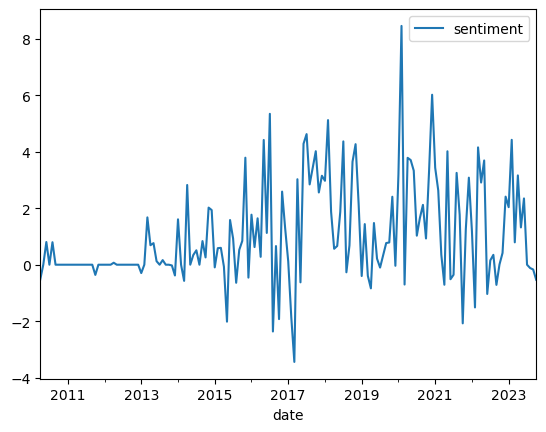

In [76]:

series1 = pd.DataFrame(lSentiment1, columns=['date', 'sentiment'])
# tell pandas that the date column is the one we use for indexing (or x-axis)
series1.set_index('date', inplace=True)
# pandas makes a guess at the type of the columns, but to make sure it doesn't get it wrong, we set the sentiment
# column to floats
series1[['sentiment']] = series1[['sentiment']].apply(pd.to_numeric)

# This step is not necessary, but pandas has a neat function that allows us to group the series at different
# resultion.  The 'how=' part tells it how to group the instances.  In this example, it sames we want to group
# by day, and add up all the sentiment scores for the same day and create a new time series called 'newSeries'
# with this day resolution
# TODO: play with this for different resolution, '1H' is by hour, '1M' is by minute etc
newSeries1 = series1.resample('1M').sum()
# this plots and shows the time series
newSeries1.plot()
plt.show()

In [77]:
lSentiment2 = vaderSentimentAnalysis('dataFromReddit_ProgrammingLanguages.csv', flagPrint, redditProcessor)

concept, art, might, python, look, like, japanese, without, english, characters
neg: 0.0, neu: 0.783, pos: 0.217, compound: 0.3612, 
dreamberd, perfect, programming, language
neg: 0.0, neu: 0.448, pos: 0.552, compound: 0.5719, 
chatgpt, related, posts, banned
neg: 0.5, neu: 0.5, pos: 0.0, compound: -0.4588, 
i've, developed, new, programming, language
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
introducing, cat, esoteric, programming, language
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
analyzed, wikipedia, documents, programming, languages, visualize, paradigm, relationship, result
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
thinking, writing, custom, layer, html, left, compiles, right, thoughts, syntax
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
keyword, used, declare, functions, various, programming, languages, source
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
rust, wanted, future, graydon, hoare
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
clickbait, headline, programmi

lambda-the-ultimate.org, computer, history, museum, releases, source, code, postscript, adobe's, permission, support
neg: 0.0, neu: 0.787, pos: 0.213, compound: 0.4019, 
coded, insertion, sort, algorithm, esoteric, programming, language
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
peridot, mvp
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ebel, programming, language, designed, genetic, programming, file, editing
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
λ, 2d, exploration, drawing, programming, language, featuring, ideas, lambda, calculus
neg: 0.0, neu: 0.808, pos: 0.192, compound: 0.2263, 
programming, language, features, would, prevented, ameliorated, log, 4shell
neg: 0.0, neu: 0.864, pos: 0.136, compound: 0.0258, 
cwerg, opinionated, light-weight, compiler, backend
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
kalyn, lispy, haskell
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
domain, specific, languages, computational, law
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
perceus,

suggest, using, physics-based, clustering, every, pair, vertices, repel, force, proportional, inverse, square, root, distance, every, pair, similar, vertices, attract, force, proportional, similarity, place, vertices, randomly, use, simple, physics, simulation, calculate, velocities, positions, system, stabilizes, get, nice, clusters
neg: 0.0, neu: 0.868, pos: 0.132, compound: 0.6486, 
great, idea, would, even, greater, could, use, div.menu, div, class, menu, div, #id, div, id, id, write, empty, parentheses, maybe, could, shorthand, div, class
neg: 0.061, neu: 0.714, pos: 0.224, compound: 0.7003, 
auto, c, missing, something, would, say, presence, c, irrelevant, since, dedicated, keyword, declare, functions
neg: 0.145, neu: 0.658, pos: 0.197, compound: 0.2023, 
one, cooler, surprising, write, ups, popular, programming, language, designer
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.5994, 
please, like, subscribe
neg: 0.0, neu: 0.172, pos: 0.828, compound: 0.5859, 
cool, chart, might, 

remember, book, engineering, compiler, goes, pretty, much, every, part, compiler, probably, skip, lexer, parser, chapters, since, they'll, probably, duplicate, much, crafting, interpreters, books, specific, type, theory, want, learn, well, types, programming, languages, advanced, sequel, looking, something, like, crafting, interpreter, may, books, think, modern, compiler, implementation, java, c, ml, appel, huge, fan, appel, book, java, first, read, though, can't, remember
neg: 0.0, neu: 0.765, pos: 0.235, compound: 0.9136, 
syntax, bit, strange, taste, language, seems, amazingly, powerful, well, designed, like, fibers, well, done, fact, high, school, student, comforting, know, next, generation, equally, capable, even, better, also, little, bit, terrifying, surpass, us, years, already, :)
neg: 0.101, neu: 0.483, pos: 0.416, compound: 0.9363, 
last, time, shared, disappointing, results, software, renderer, written, language, vortex, back, vortex, ast, interpreter, since, i've, taken, ti

think, issue, nim, crystal, want, language, garbage, collection, already, many, options, want, language, without, garbage, collection, ’, basically, got, c, c, rust, zig, think, c, rust, complicated, ’, really, got, c, zig
neg: 0.0, neu: 0.902, pos: 0.098, compound: 0.1531, 
wow, wish, could, take, opportunity, obviously, know, place, life, right, us, apply, start, working, .., 10, years
neg: 0.0, neu: 0.601, pos: 0.399, compound: 0.8519, 
fun, reference, chapter, polymorphic, references, discusses, one, favourite, problems, mix, mutability, polymorphism, issue, also, crops, haskell, use, unsafeperformio, top-level, seen, surprise, people, often, unsafe, unsafeperformio, taken, effect, ordering, difficult, predict, fact, unsafe, subverts, type, safety, entirely, covariant, containers, similar, problem, using, subtyping, instead, polymorphism
neg: 0.146, neu: 0.702, pos: 0.152, compound: 0.0772, 
hi, everyone, i've, developing, cognate, subreddit's, corresponding, discord, server, may, 

would, want, see, front, page, stole, rust's, cargo, c, zero-cost, abstractions, gave, lisp, extensible, syntax, made, compile, natively, primarily, work, low, level, game, engine, code, suffice, say, would, take, lot, consider, switching, c, quote, probably, 20, i'd, really, want, even, mention, core, language, syntax, would, 100, get, attention, ​, runner, would, gpu, scripting, using, apl, array, language, really, apl, almost, literal, magic, sometimes, think, would, find, natural, home, gpu, programming, someone, crazy, enough, make, work, even, subscript, shader, programming, language
neg: 0.055, neu: 0.882, pos: 0.062, compound: -0.1027, 
afaik, lisp, designed, paper, language, mccarthy, sure, actually, feasible, implement, day's, hardware
neg: 0.0, neu: 0.827, pos: 0.173, compound: 0.3182, 
exactly, i'm, inko, ):, uses, single, ownership, come, borrow, checker, instead, model, based, paper, concurrency, i've, adopted, somewhat, simplified, approach, one, used, pony, turn, based,

awesome, things, dislike, languages
neg: 0.299, neu: 0.23, pos: 0.471, compound: 0.3612, 
seems, shame, leave, sitting, comments, time, shake, strong, sense, really, book's, target, audience, frankly, whenever, read, language, design, implementation, text, days, spend, little, bit, effort, trying, follow, along, ultimately, give, exasperation, author, designing, exact, language, would, design, state, nothing, less, confession, severe, tunnel, vision, certainly, critique, particular, work, least, read, part, scanners, cashing, worth, made, much, book, pl, text, several, years, :-), overall, found, style, light, easy, read, fear, lost, ability, read, beginner's, eyes, idea, approachable, joe, programmer, seem, hit, nice, balance, exploring, implementation, details, things, theoretical, underpinnings, say, feel, like, motivated, reader, difficulty, pulling, search_engine, digging, deeper, concepts, lightly, introduced, book, risk, belaboring, self-deprecation, bit, much, think, i'd, patie

although, many, implementations, happen, use, syntactic, compile-time, reasoning, k, type, checking, lessen, run-time, checking, overheads, implementation, detail, correct, whether, type, check, compile, time, run, time, significantly, effects, semantics, haskell, incorrectly, typed, program, haskell, program, incorrect, typing, simply, part, language, python, otherhand, although, type, errors, exceptions, python, programmer, write, programs, way, type, errors, raised, catched, part, normal, functioning, style, like, better, somewhat, subjective, ultimately, semantics, implementation
neg: 0.068, neu: 0.855, pos: 0.077, compound: 0.1531, 
reddit, buggy, lost, edits, grrrr, complementary, link, shell, source, code, generates, set, static, pages, manually, sifted
neg: 0.133, neu: 0.867, pos: 0.0, compound: -0.3182, 
pl, zoo, nice, implementations, ml, none, claim, self-hosted, may, possible, write, implemetation, mini-haskell, mini-haskell, turn, something, powerful, enough, actually, har

imo, best, way, understand, hindley, milner, type, inference, look, constraint-based, system, also, ghc, compiler, deal, write, function, foo, x, typechecker, sets, foo, type, fresh, unification, variable, foo, function, taking, 1, argument, two, fresh, unification, variables, b, c, created, types, argument, result, typechecker, emits, constraint, b, ->, c, tn, body, function, typechecker, discovers, return, foo, array, x, assigns, fresh, unification, variable, type, foo, array, x, emits, constraint, c, body, foo, array, x, typechecked, argument, array, x, assigned, unification, variable, e, function, call, constraint, e, ->, ist, type, foo, emitted, finally, array, instantiated, type, f, ->, array, f, constraints, f, b, e, array, f, emitted, x, type, b, result, supposed, type, e, generated, constraints, b, ->, c, c, e, ->, f, b, e, array, f, second, phase, typechecker, constraint, solver, kicks, tries, solve, constraints, part, pretty, boring, i'm, going, highlight, interesting, steps

cs50, structure, interpretation, computer, programs, concepts, techniques, models, computer, programming, haskell, programming, first, principles
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
believe, people, decided, passing, input, params, output, return, values, clearer, mixing, two, least, that's, see, work, still, modify, parameters, mainstream, languages, e, add, elements, list, update, field, e, g, python, java, avoided, clearer, call, side, immediately, see, may, change, without, open, declaration, worse, implementation
neg: 0.053, neu: 0.832, pos: 0.115, compound: 0.4318, 
like, name, well, fact, naughty, dog, named, language, goal, create, jak, daxter, crash, bandicoot, games
neg: 0.132, neu: 0.539, pos: 0.328, compound: 0.4588, 
pony, vale, lobster
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
long, interesting, read, know, exactly, properties, dependent, types, make, undesirable
neg: 0.213, neu: 0.588, pos: 0.199, compound: -0.0516, 
see, main, attraction, declarative, prog

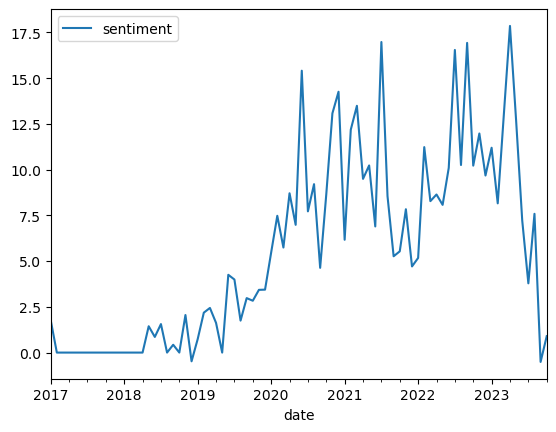

In [79]:

series2 = pd.DataFrame(lSentiment2, columns=['date', 'sentiment'])
# tell pandas that the date column is the one we use for indexing (or x-axis)
series2.set_index('date', inplace=True)
# pandas makes a guess at the type of the columns, but to make sure it doesn't get it wrong, we set the sentiment
# column to floats
series2[['sentiment']] = series2[['sentiment']].apply(pd.to_numeric)
newSeries2 = series2.resample('1M').sum()
newSeries2.plot()
plt.show()

In [80]:
newSeries2
series2[['sentiment']] = series2[['sentiment']].apply(pd.to_numeric)
newSeries2 = series2.resample('1M').sum()
newSeries2.plot()
plt.show()

,sentiment
date,
2017-01-31,1.7691
2017-02-28,0.0000
2017-03-31,0.0000
2017-04-30,0.0000
2017-05-31,0.0000
...,...
2023-06-30,7.2202
2023-07-31,3.7846
2023-08-31,7.5847


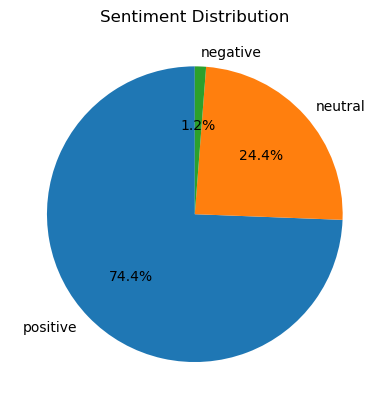

In [82]:
def categorize_sentiment(value):
    if value > 0.5:
        return 'positive'
    elif value < -0.5:
        return 'negative'
    else:
        return 'neutral'

newSeries2['category'] = newSeries2['sentiment'].apply(categorize_sentiment)

# Count occurrences of each category
category_counts = newSeries2['category'].value_counts()

# Plot pie chart
category_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.ylabel('')  # This removes 'category' from the y-axis
plt.show()